In [1]:
import numpy as np
from random import gauss
import pickle
path = 'd:/largedata/'
pkl_file = open(path + 'data.pkl', 'w') #没有该文件的情况下，open等同于建立一个文件。文件格式为pkl
a = [gauss(1.5, 2) for i in range(1000000)]  #创建一个随机list
%time pickle.dump(a, pkl_file) #将变量a存到刚刚建立的data.pkl文件中

Wall time: 3.48 s


In [2]:
b = [gauss(1.5, 2) for i in range(100)] #加一个c list到文件里
pickle.dump(b, pkl_file) #pickle文件遵从FIFO
pkl_file.close() #关闭打开的文件

In [3]:
b[:5] #c存在于内存

[-0.16141596341039688,
 0.4611299666242299,
 1.0430675098868512,
 3.797804460132971,
 3.1795924319989415]

In [4]:
a[:5]

[2.0340456297761143,
 2.611155744472918,
 3.363235076743837,
 2.989008731561656,
 2.118293248500023]

In [5]:
pkl_file = open(path + 'data.pkl', 'r')
c = pickle.load(pkl_file) #难道整个data.pkl文件就只存一个list? 

In [6]:
c[:5] #data里面存了a和c, 但是b只调用了a。因为是FIFO

[2.0340456297761143,
 2.611155744472918,
 3.363235076743837,
 2.989008731561656,
 2.118293248500023]

In [7]:
np.allclose(np.array(a), np.array(c)) #内建方法，检查两个数组是否完全一致

True

In [8]:
np.sum(np.array(a) - np.array(c)) #用差值检验是否一致

0.0

In [9]:
d = pickle.load(pkl_file)

In [10]:
d[:5] #第二次，调用的就是第二个数组

[-0.16141596341039688,
 0.4611299666242299,
 1.0430675098868512,
 3.797804460132971,
 3.1795924319989415]

In [11]:
pkl_file.close()

In [12]:
pkl_file = open(path + 'data.pkl', 'w')
x = np.array(a)
y = np.array(b) ** 2 
pickle.dump({'x':x, 'y':y}, pkl_file) # 为了便于提取，使用字典方式储存。此外，如果调用narray，储存的速度大幅提高
pkl_file.close()

In [13]:
pkl_file = open(path + 'data.pkl', 'r')
data = pickle.load(pkl_file) #调入内存
pkl_file.close() #立刻关闭
for key in data.keys(): #调用所有的key，做循环
    print key, data[key][:5]  




y [  0.02605511   0.21264085   1.08798983  14.42331872  10.10980803]
x [ 2.03404563  2.61115574  3.36323508  2.98900873  2.11829325]


In [14]:
rows = 5000
a = np.random.standard_normal((rows,5)) #建立随机数组
a.round(4)


array([[-0.182 ,  1.3253, -1.5748, -0.5584, -1.1845],
       [ 0.0506,  0.9798,  0.5303,  0.3475,  1.1358],
       [-1.6751, -1.6567,  0.6266,  0.1166,  1.0322],
       ..., 
       [ 1.1605,  0.4137,  2.5708, -0.5579, -1.348 ],
       [ 1.5922, -0.0101,  1.6084,  0.509 ,  0.2391],
       [-0.599 ,  1.8216, -0.7818,  0.1947, -0.3019]])

In [15]:
import pandas as pd
t = pd.date_range(start='2015/1/1', periods=rows, freq='H', )  #建立一个世界序列datetime以便加到前面数组做序列
t


DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-07-27 22:00:00', '2015-07-27 23:00:00',
               '2015-07-28 00:00:00', '2015-07-28 01:00:00',
               '2015-07-28 02:00:00', '2015-07-28 03:00:00',
               '2015-07-28 04:00:00', '2015-07-28 05:00:00',
               '2015-07-28 06:00:00', '2015-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [16]:
csv_file = open(path + 'data.csv', 'w') #建立一个csv，可写模式打开
header = 'date,no1,no2,no3,no4,no5\n' #csv是文本文件，所以用字符串写，之间也on用逗号连接. \n用于换行
csv_file.write(header) #写入第一行

In [17]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' %(t_, no1, no2, no3, no4, no5) #因为是csv所以都是字符串
    csv_file.write(s)
csv_file.close()

In [18]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines() #d读取文件
csv_file.close() #调入内存后关闭文件
for line in content[:5]:
    print line

date,no1,no2,no3,no4,no5

2015-01-01 00:00:00,-0.181997,1.325274,-1.574789,-0.558366,-1.184524

2015-01-01 01:00:00,0.050602,0.979814,0.530277,0.347545,1.135842

2015-01-01 02:00:00,-1.675114,-1.656682,0.626562,0.116553,1.032162

2015-01-01 03:00:00,-0.093832,-1.220132,0.339836,-0.706046,-0.867298



In [19]:
import numpy as np
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00', dtype='datetime64[m]') #用np建立时间序列datetime数据
len(dtimes)

3681360

In [20]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')]) #确定数组每一个列的数据格式
data = np.zeros(len(dtimes), dtype=dty) #建立0数组
data['Date'] = dtimes

In [21]:
a = np.random.standard_normal((len(dtimes),2)).round(5) #建立数组
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

numpy的特点是不需要open,直接储存或载入

In [22]:
%time np.save(path + 'array.npy', data) #直接建立一个文件储存 用save。后缀名npy

Wall time: 1.66 s


In [23]:
%time np.load(path + 'array.npy')

Wall time: 32 ms


array([ (datetime.datetime(2015, 1, 1, 10, 0), 0.030740000307559967, 0.8828399777412415),
       (datetime.datetime(2015, 1, 1, 10, 1), 0.6269699931144714, -1.7137099504470825),
       (datetime.datetime(2015, 1, 1, 10, 2), 1.4511799812316895, -0.3873000144958496),
       ...,
       (datetime.datetime(2021, 12, 31, 21, 57), -0.7601199746131897, 1.901729941368103),
       (datetime.datetime(2021, 12, 31, 21, 58), -0.5940999984741211, -1.123710036277771),
       (datetime.datetime(2021, 12, 31, 21, 59), 0.2635200023651123, 0.08028999716043472)], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [24]:
import numpy as np 
data = np.random.standard_normal((10000,6000))
%time np.save(path + 'array.npy', data)

Wall time: 3.22 s


In [25]:
%time np.load(path + 'array.npy') #读写大文件的速度很快

Wall time: 233 ms


array([[  5.74363342e-01,   3.83285715e-02,  -4.54710913e-01, ...,
         -7.82445822e-01,   1.33421348e+00,   3.88712221e-02],
       [  2.45592216e-04,   1.16451066e+00,   5.06363211e-01, ...,
         -1.08120036e+00,  -1.06795237e-01,  -2.46471877e+00],
       [  1.49959987e-01,   8.65282287e-01,   1.72495121e-01, ...,
          7.06476987e-01,  -1.03730764e+00,   2.28363801e-01],
       ..., 
       [  7.97318191e-03,   7.08765817e-01,  -5.89898264e-01, ...,
         -5.50317795e-01,   5.45141879e-01,  -9.25180587e-01],
       [ -1.33996113e+00,  -1.13582972e+00,  -2.77069590e-02, ...,
          1.52093122e+00,  -1.23885975e+00,   7.13854786e-01],
       [  1.38299965e-01,  -4.90940220e-01,  -4.38094172e-01, ...,
          6.65281270e-01,  -1.08441781e+00,   4.00549073e-01]])

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
data = np.random.standard_normal((1000000,5)).round(5)
filename = path + 'numbs'



以下考验panas的读写能力。 pandas能够读写多种格式的数据csv, sql, json等

Wall time: 266 ms


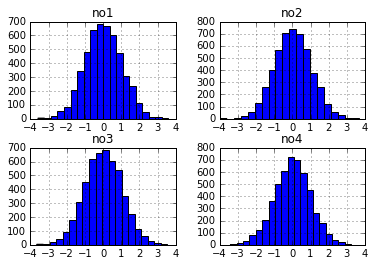

In [44]:
%time pd.read_csv(path + 'data.csv', header=0, index_col=0)[['no1','no2','no3','no4']].hist(bins=20) #读取速度很快
plt.grid(True)

这里没有pd的文件。如果是pd的文件，可以直接 .to_csv(path)储存到硬盘。 也不需要open这一步骤

In [45]:
data = pd.read_csv(path + 'data.csv', header=0, index_col=0)

In [46]:
type(data)

pandas.core.frame.DataFrame

In [47]:
%time data.to_excel(path + 'data.xlsx') 

Wall time: 951 ms


Wall time: 840 ms


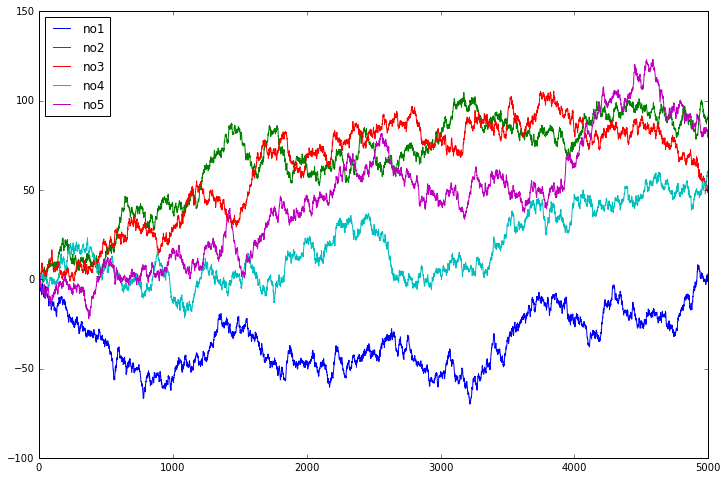

In [53]:
%time pd.read_excel(path + 'data.xlsx', 'Sheet1').cumsum().plot(figsize=(12,8))
